# Marketing dataset - Kaggle competition

### Kasry Hamza - Machine learning competition

In [52]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as pyp
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

### Importing the data

In [53]:
# Importing the data
train_df = pd.read_csv('./train.csv', sep=";")
test_df = pd.read_csv('./test.csv', sep=";")
combine = [train_df, test_df]

In [54]:
#outputing the head of data
train_df.head(10)
#Verify if any column contains null values
pd.isnull(train_df).sum() >0

age               False
job               False
marital           False
education         False
default           False
housing           False
loan              False
contact           False
month             False
day_of_week       False
duration          False
campaign          False
pdays             False
previous          False
poutcome          False
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
euribor3m         False
nr.employed       False
y                 False
dtype: bool

In [55]:
train_df.tail(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
2989,43,blue-collar,married,basic.9y,unknown,yes,no,cellular,may,fri,...,3,999,1,failure,-1.8,92.893,-46.2,1.313,5099.1,no
2990,53,blue-collar,married,basic.4y,no,no,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.968,5228.1,no
2991,42,admin.,married,high.school,no,yes,yes,telephone,jul,mon,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
2992,40,technician,married,professional.course,no,no,no,telephone,jun,fri,...,2,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
2993,41,management,married,university.degree,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.962,5228.1,no
2994,47,blue-collar,single,basic.9y,unknown,no,no,cellular,may,wed,...,1,999,0,nonexistent,-1.8,92.893,-46.2,1.334,5099.1,no
2995,53,admin.,married,university.degree,no,no,yes,telephone,may,tue,...,13,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,no
2996,60,retired,married,university.degree,no,yes,no,cellular,oct,mon,...,2,999,0,nonexistent,-1.1,94.601,-49.5,1.000,4963.6,no
2997,32,technician,single,university.degree,no,no,no,cellular,nov,thu,...,1,999,1,failure,-0.1,93.200,-42.0,4.076,5195.8,no
2998,67,retired,married,basic.4y,no,no,no,cellular,aug,mon,...,3,999,0,nonexistent,-1.7,94.027,-38.3,0.898,4991.6,no


In [56]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2999 entries, 0 to 2998
Data columns (total 21 columns):
age               2999 non-null int64
job               2999 non-null object
marital           2999 non-null object
education         2999 non-null object
default           2999 non-null object
housing           2999 non-null object
loan              2999 non-null object
contact           2999 non-null object
month             2999 non-null object
day_of_week       2999 non-null object
duration          2999 non-null int64
campaign          2999 non-null int64
pdays             2999 non-null int64
previous          2999 non-null int64
poutcome          2999 non-null object
emp.var.rate      2999 non-null float64
cons.price.idx    2999 non-null float64
cons.conf.idx     2999 non-null float64
euribor3m         2999 non-null float64
nr.employed       2999 non-null float64
y                 2999 non-null object
dtypes: float64(5), int64(5), object(11)
memory usage: 492.1+ KB
_________

In [57]:
train_df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000
mean,39.889296,255.085028,2.526842,962.227743,0.192064,0.079093,93.584553,-40.578226,3.605769,5165.642314
std,10.282229,256.265737,2.556995,187.599866,0.551960,1.559126,0.581162,4.594237,1.739625,74.384632
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,101.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.876000,-41.800000,4.857000,5191.000000
75%,47.000000,316.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [58]:
train_df.describe(include=['O'])
# train_df.describe(include=['0'])

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,2999,2999,2999,2999,2999,2999,2999,2999,2999,2999,2999
unique,12,4,7,2,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,743,1812,915,2403,1589,2437,1935,1024,628,2567,2668


# Data pre-processing

### Processing the 'age' column

In [59]:
#To know how those age corelates with the answer
ageBands = pd.DataFrame(train_df['y'].map({'no': 0, 'yes': 1}))
ageBands['y'] = train_df['y'].map({'no': 0, 'yes': 1})
ageBands['ageBand'] = pd.cut(train_df['age'], 5)
ageBands[['ageBand', 'y']].groupby(['ageBand'], as_index=False).mean().sort_values(by='ageBand', ascending=True)

,ageBand,y
0,"(17.93, 32.0]",0.118963
1,"(32.0, 46.0]",0.088083
2,"(46.0, 60.0]",0.118825
3,"(60.0, 74.0]",0.343750
4,"(74.0, 88.0]",0.611111


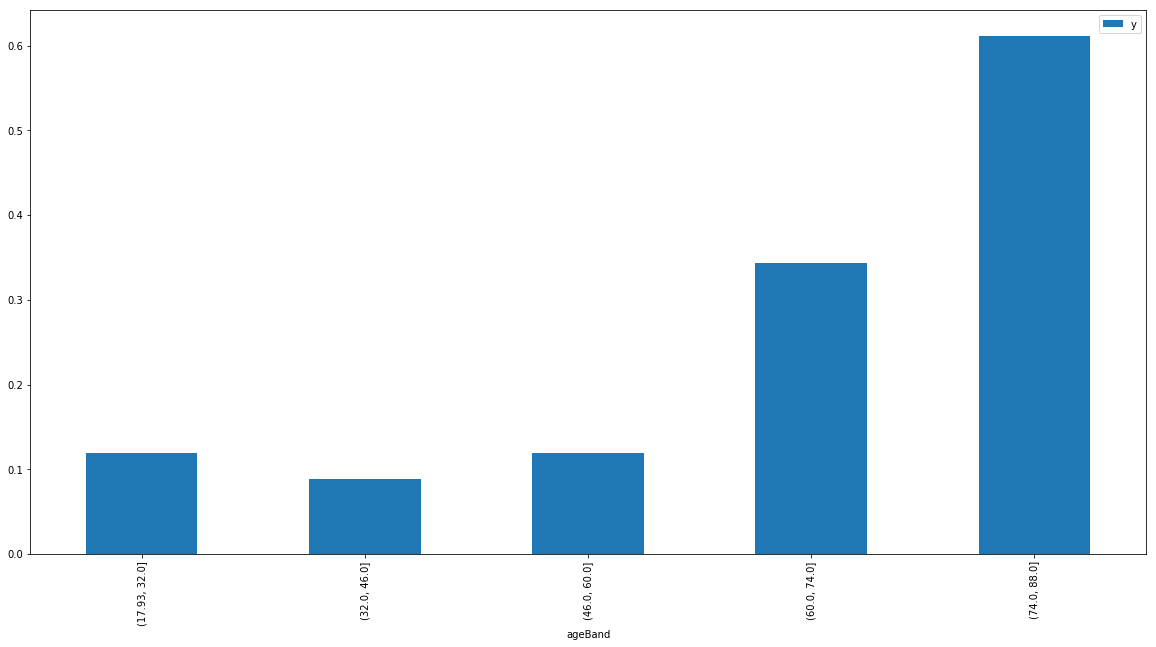

In [60]:
# train_df["y"].describe()
train_df.y = train_df['y'].map({'no': 0, 'yes': 1})
train_df.y = train_df.y.astype(int)

pivot = ageBands.pivot_table(index="ageBand",values="y")
pivot.plot.bar(figsize=(20, 10))
pyp.show()

In [61]:
# Strat by changing the age, according to the agebands and their corelation to survival
# for dataset in combine:    
train_df.loc[ train_df['age'] <= 32, 'age'] = 0
train_df.loc[(train_df['age'] > 32) & (train_df['age'] <= 46), 'age'] = 1
train_df.loc[(train_df['age'] > 46) & (train_df['age'] <= 60), 'age'] = 2
train_df.loc[(train_df['age'] > 60) & (train_df['age'] <= 74), 'age'] = 3
train_df.loc[ train_df['age'] > 74, 'age']

test_df.loc[ test_df['age'] <= 32, 'age'] = 0
test_df.loc[(test_df['age'] > 32) & (test_df['age'] <= 46), 'age'] = 1
test_df.loc[(test_df['age'] > 46) & (test_df['age'] <= 60), 'age'] = 2
test_df.loc[(test_df['age'] > 60) & (test_df['age'] <= 74), 'age'] = 3
test_df.loc[ test_df['age'] > 74, 'age']
train_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0
1,1,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0
2,0,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,0
3,1,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,0
4,2,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,0


## Preprocessing the 'duration' column

In [62]:
#To know how those call durations corelate with the answer
callBands = pd.DataFrame(train_df['y'])
callBands
# callBands['y'] = train_df['y'].map({'no': 0, 'yes': 1})
callBands['callBand'] = pd.cut(train_df['duration'], 5)
callBands[['callBand', 'y']].groupby(['callBand'], as_index=False).mean().sort_values(by='callBand', ascending=True)

,callBand,y
0,"(-3.643, 728.6]",0.083948
1,"(728.6, 1457.2]",0.607143
2,"(1457.2, 2185.8]",0.500000
3,"(2185.8, 2914.4]",1.000000
4,"(2914.4, 3643.0]",0.500000


After verifying the accuracy, I did remove this duration pre-processing

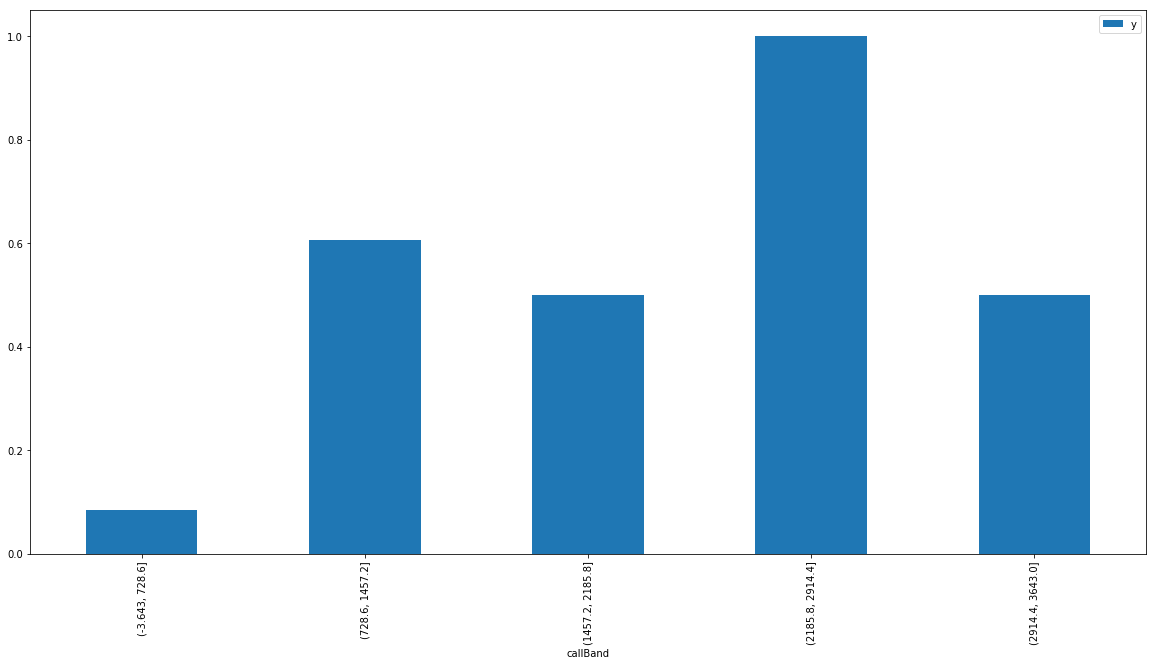

In [63]:
pivot = callBands.pivot_table(index="callBand",values="y")
pivot.plot.bar(figsize=(20, 10))
pyp.show()
# REMOVED: Worsened the accuracy :p lol
# train_df.loc[ train_df['duration'] <= 607.167, 'duration'] = 0
# train_df.loc[(train_df['duration'] > 607.167) & (train_df['duration'] <= 1214.33), 'duration'] = 1
# train_df.loc[(train_df['duration'] > 1214.33) & (train_df['duration'] <= 1821.5), 'duration'] = 2
# train_df.loc[(train_df['duration'] > 1821.5) & (train_df['duration'] <= 2428.667), 'duration'] = 3
# train_df.loc[(train_df['duration'] > 2428.667) & (train_df['duration'] <= 3035.833), 'duration'] = 4
# train_df.loc[ train_df['duration'] > 3035.833, 'duration'] = 5
# train_df = pd.concat([train_df, pd.get_dummies(train_df['duration'], prefix='durationBand')], axis=1)
# train_df = train_df.drop(['duration'], axis=1)

# test_df.loc[ test_df['duration'] <= 607.167, 'duration'] = 0
# test_df.loc[(test_df['duration'] > 607.167) & (test_df['duration'] <= 1214.33), 'duration'] = 1
# test_df.loc[(test_df['duration'] > 1214.33) & (test_df['duration'] <= 1821.5), 'duration'] = 2
# test_df.loc[(test_df['duration'] > 1821.5) & (test_df['duration'] <= 2428.667), 'duration'] = 3
# test_df.loc[ (test_df['duration'] > 2428.667) & (test_df['duration'] <= 3035.833), 'duration'] = 4
# test_df.loc[ test_df['duration'] > 3035.833, 'duration'] = 5
# test_df = pd.concat([test_df, pd.get_dummies(test_df['duration'], prefix='durationBand')], axis=1)
# # We manually add not existing columns
# test_df['durationBand_5'] = 0
# test_df['durationBand_4'] = 0
# test_df = test_df.drop(['duration'], axis=1)
# train_df.head()

## Columns 'pdays & poutcome' processing

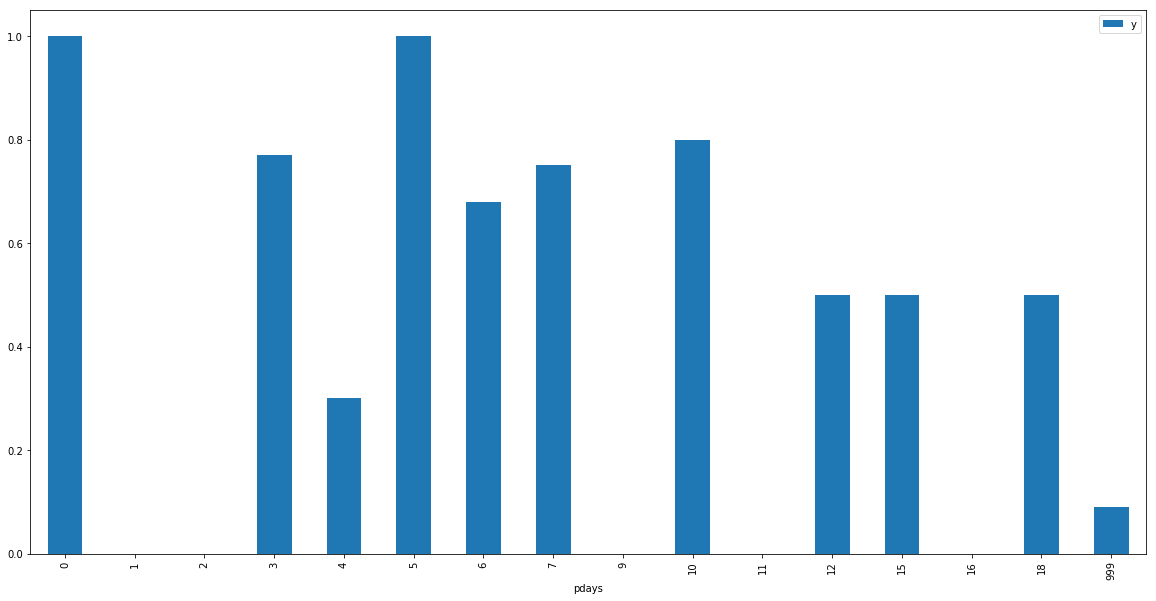

In [64]:
train_df["y"].describe()

pivot = train_df.pivot_table(index="pdays",values="y")
pivot.plot.bar(figsize=(20, 10))
pyp.show()

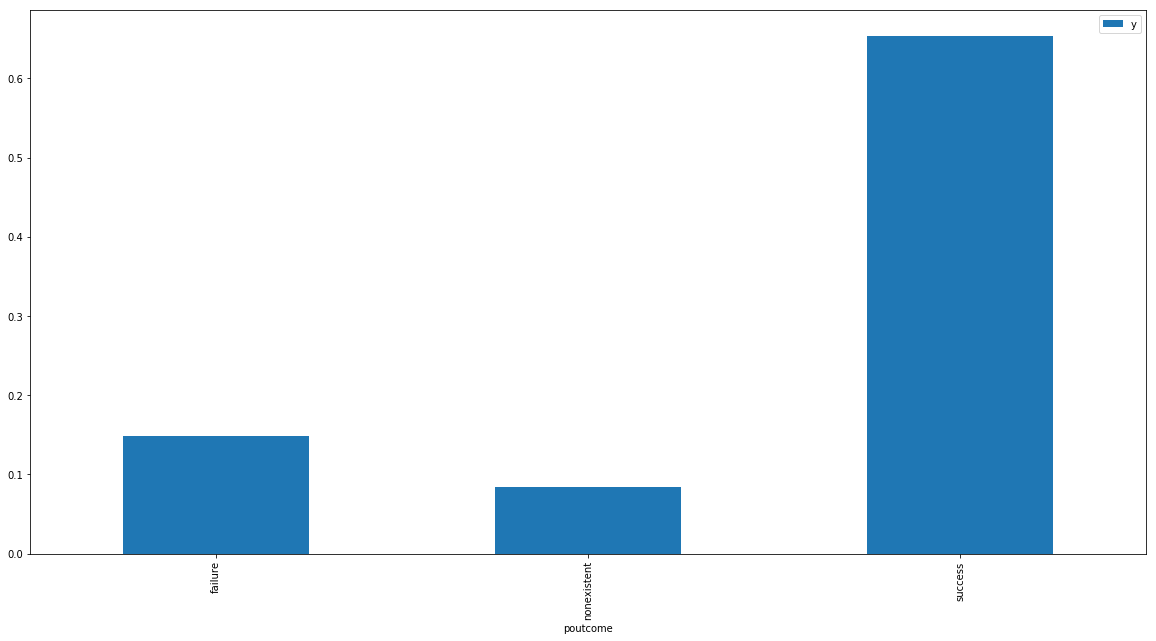

In [65]:
pivot = train_df.pivot_table(index="poutcome",values="y")
pivot.plot.bar(figsize=(20, 10))
pyp.show()

In [66]:
train_df['poutcome'] = train_df['poutcome'].map({'failure': 0, 'success': 1,'nonexistent':-1})
test_df['poutcome'] = test_df['poutcome'].map({'failure': 0, 'success': 1,'nonexistent':-1})

## Column 'job'

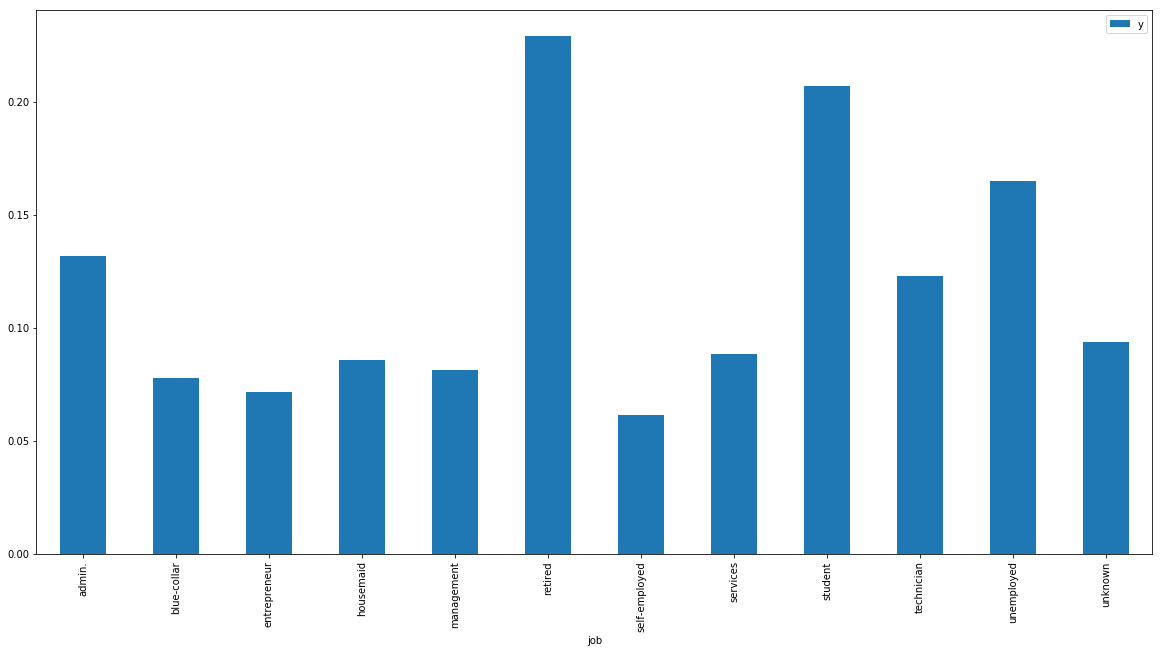

In [67]:
pivot = train_df.pivot_table(index="job",values="y")
pivot.plot.bar(figsize=(20, 10))
pyp.show()

In [68]:
train_df['job'] = train_df['job'].map({'unemployed': 0, 'housemaid': 1, 'retired':2,
                                      'services':3, 'student':4, 'technician':5,
                                     'blue-collar':6, 'self-employed':7, 'management':8,
                                      'admin.':9, 'entrepreneur':10, 'unknown':-1})
test_df['job'] = test_df['job'].map({'unemployed': 0, 'housemaid': 1, 'retired':2,
                                      'services':3, 'student':4, 'technician':5,
                                     'blue-collar':6, 'self-employed':7, 'management':8,
                                      'admin.':9, 'entrepreneur':10, 'unknown':-1})


## Column 'marital'

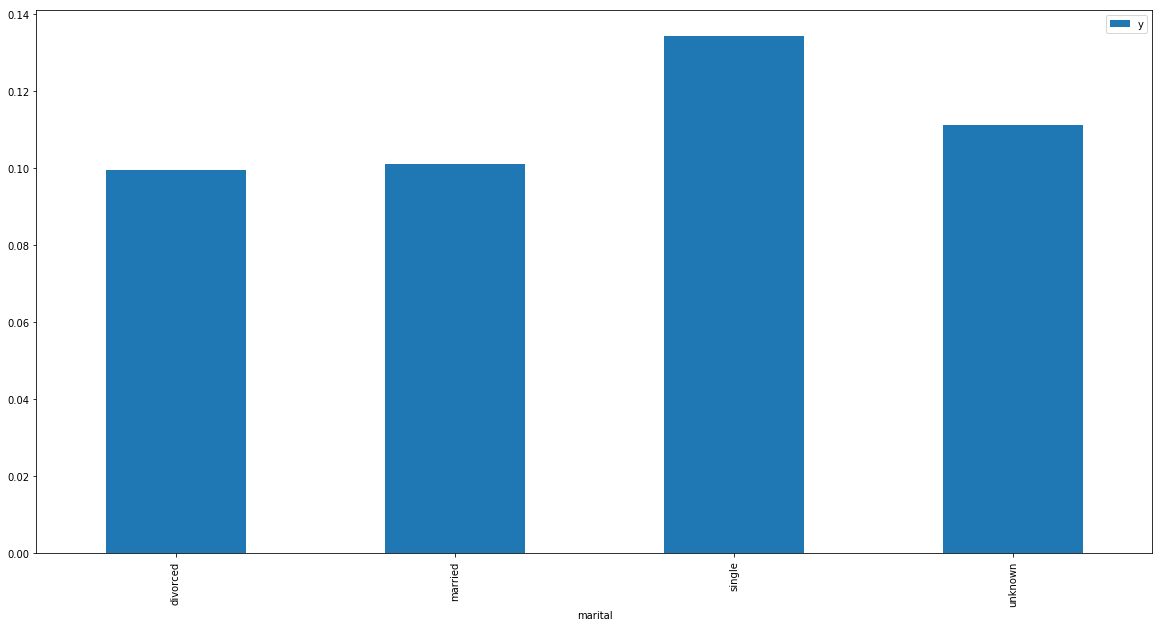

In [69]:
pivot = train_df.pivot_table(index="marital",values="y")
pivot.plot.bar(figsize=(20, 10))
pyp.show()

In [70]:
train_df = pd.concat([train_df, pd.get_dummies(train_df['marital'], prefix='marital')], axis=1)
train_df = train_df.drop(['marital'], axis=1)

test_df = pd.concat([test_df, pd.get_dummies(test_df['marital'], prefix='marital')], axis=1)
test_df = test_df.drop(['marital'], axis=1)

## Column 'education'

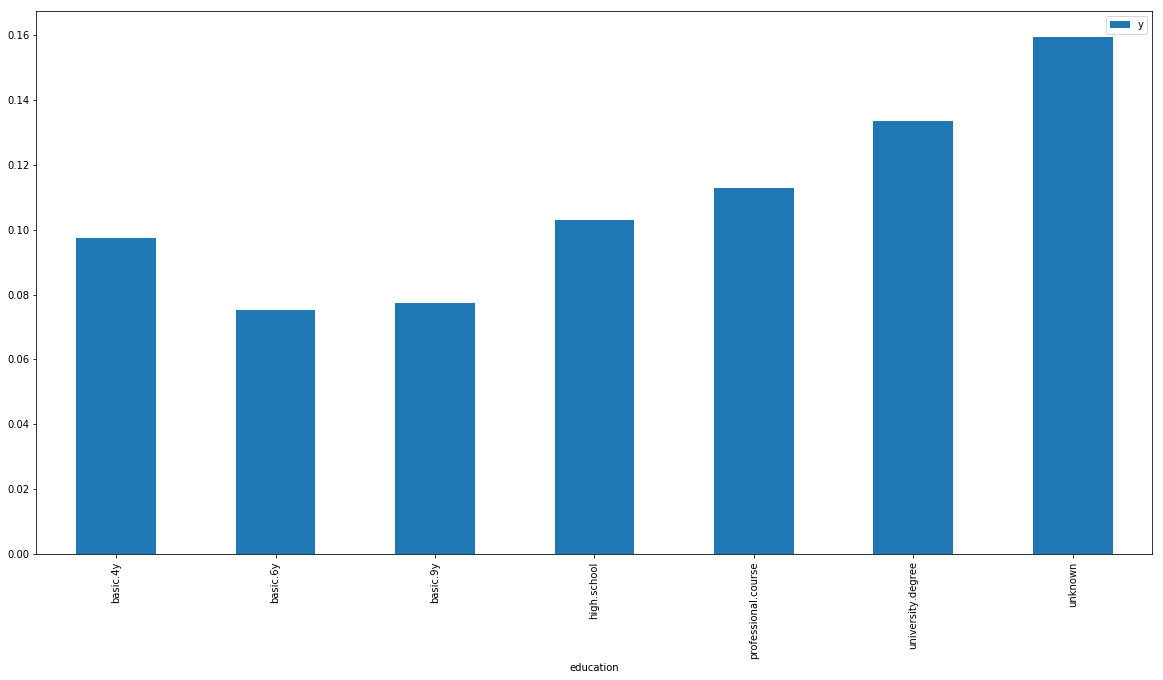

In [71]:
pivot = train_df.pivot_table(index="education",values="y")
pivot.plot.bar(figsize=(20, 10))
pyp.show()

In [72]:
train_df['education'] = train_df['education'].map({'illiterate': 0, 'high.school': 1, 'basic.4y':2,
                                      'basic.6y':3, 'university.degree':4, 'professional.course':5,
                                     'basic.9y':6, 'unknown':-1})
test_df['education'] = test_df['education'].map({'illiterate': 0, 'high.school': 1, 'basic.4y':2,
                                      'basic.6y':3, 'university.degree':4, 'professional.course':5,
                                     'basic.9y':6, 'unknown':-1})

## Column 'default'

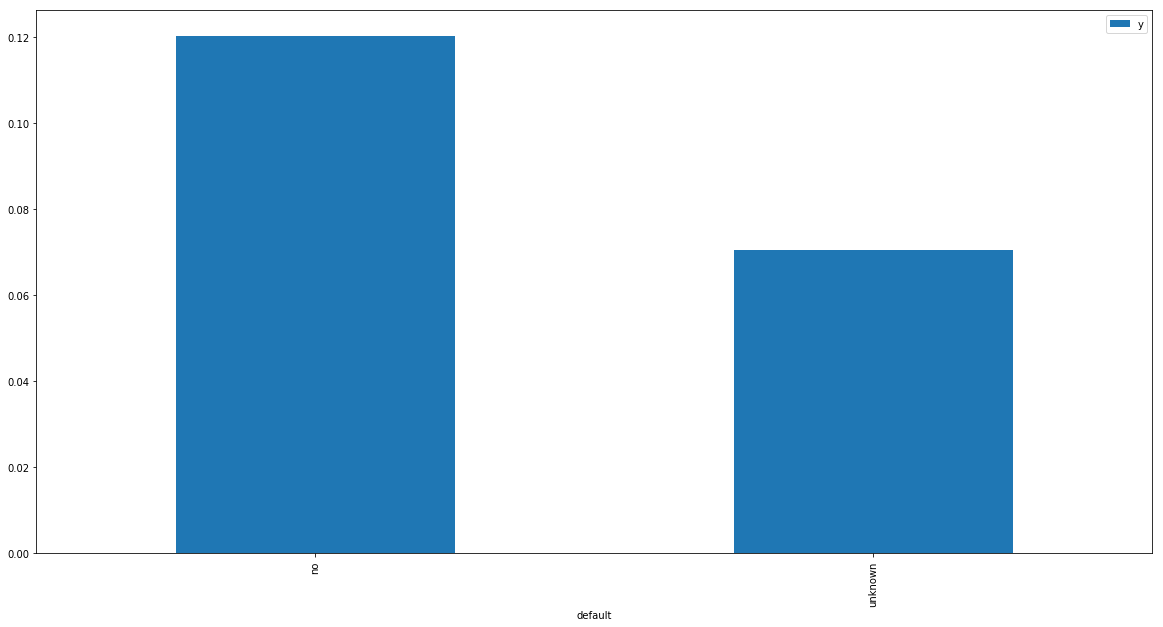

In [73]:
pivot = train_df.pivot_table(index="default",values="y")
pivot.plot.bar(figsize=(20, 10))
pyp.show()

In [74]:
train_df['default'] = train_df['default'].map({'yes':1, 'no':0, 'unknown':-1})
test_df['default'] = test_df['default'].map({'yes':1, 'no':0, 'unknown':-1})


## Column 'housing'

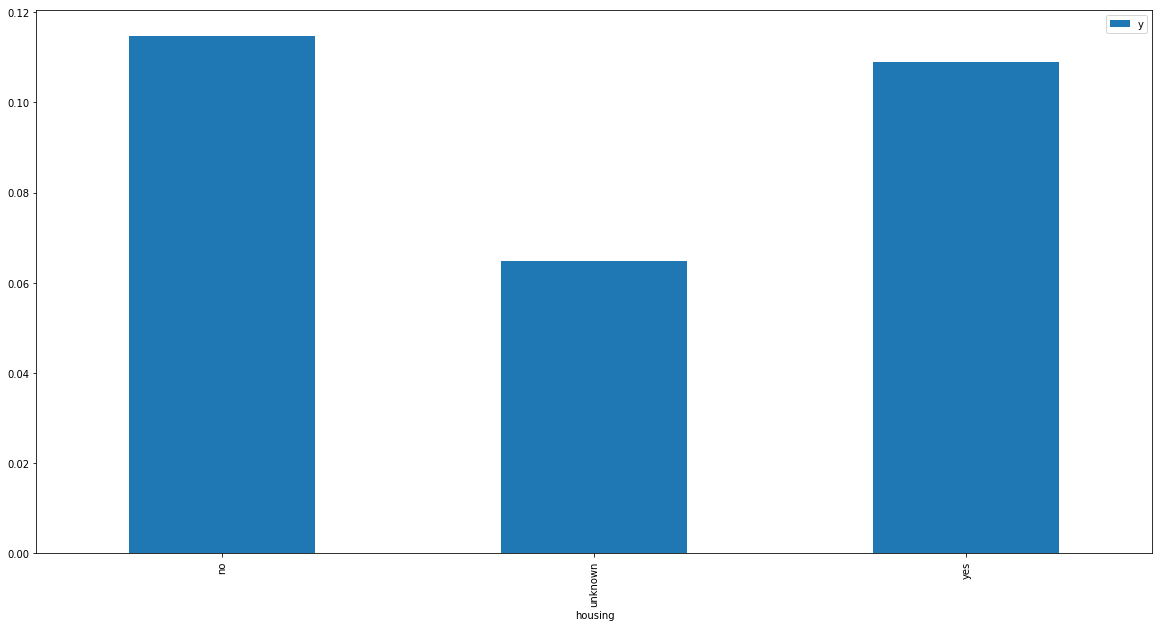

In [75]:
pivot = train_df.pivot_table(index="housing",values="y")
pivot.plot.bar(figsize=(20, 10))
pyp.show()

In [76]:
train_df['housing'] = train_df['housing'].map({'yes':1, 'no':0, 'unknown':-1})
test_df['housing'] = test_df['housing'].map({'yes':1, 'no':0, 'unknown':-1})


## Column 'loan'

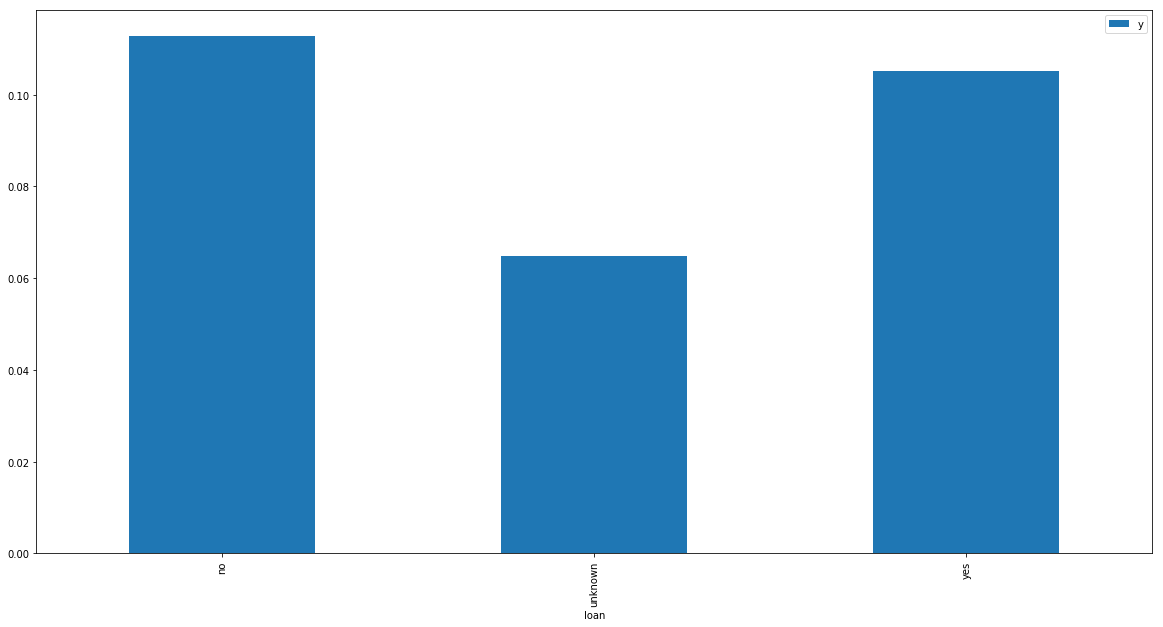

In [77]:
pivot = train_df.pivot_table(index="loan",values="y")
pivot.plot.bar(figsize=(20, 10))
pyp.show()

In [78]:
train_df['loan'] = train_df['loan'].map({'yes':1, 'no':0, 'unknown':-1})
test_df['loan'] = test_df['loan'].map({'yes':1, 'no':0, 'unknown':-1})


## Column 'contact'

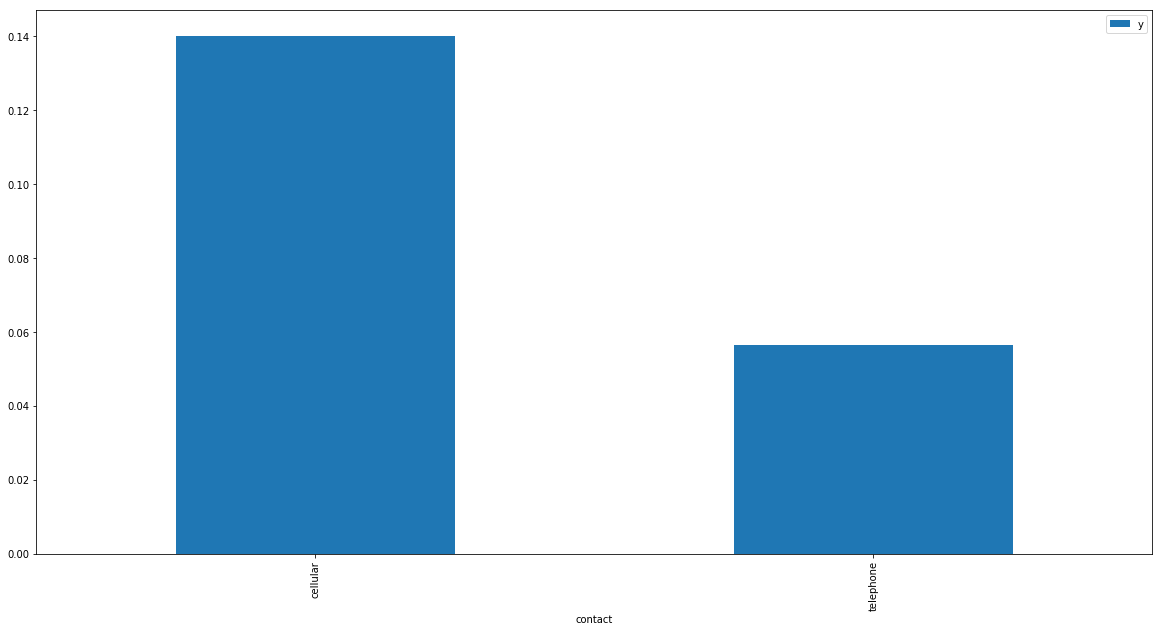

In [79]:
pivot = train_df.pivot_table(index="contact",values="y")
pivot.plot.bar(figsize=(20, 10))
pyp.show()

In [80]:
train_df['contact'] = train_df['contact'].map({'cellular':1, 'telephone':0})
test_df['contact'] = test_df['contact'].map({'cellular':1, 'telephone':0})


## Column 'month' & 'day_of_week'

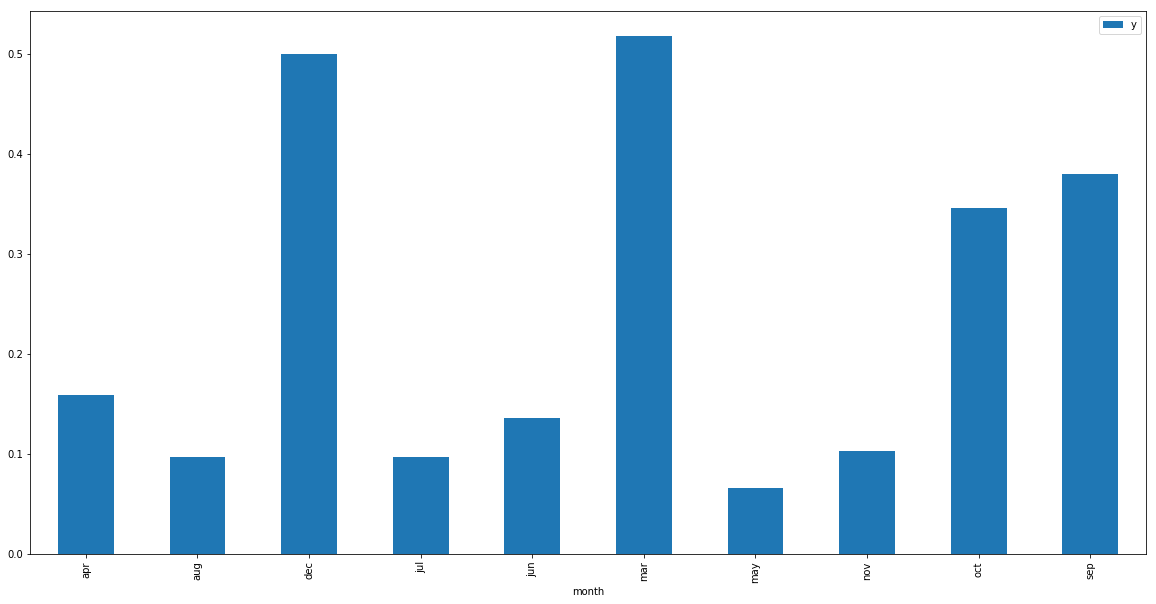

In [81]:
pivot = train_df.pivot_table(index="month",values="y")
pivot.plot.bar(figsize=(20, 10))
train_df['month'].unique()
pyp.show()

In [82]:
train_df = pd.concat([train_df, pd.get_dummies(train_df['month'], prefix='month')], axis=1)
train_df = train_df.drop(['month'], axis=1)

train_df = pd.concat([train_df, pd.get_dummies(train_df['day_of_week'], prefix='day_of_week')], axis=1)
train_df = train_df.drop(['day_of_week'], axis=1)
test_df = pd.concat([test_df, pd.get_dummies(test_df['month'], prefix='month')], axis=1)
test_df = test_df.drop(['month'], axis=1)

test_df = pd.concat([test_df, pd.get_dummies(test_df['day_of_week'], prefix='day_of_week')], axis=1)
test_df = test_df.drop(['day_of_week'], axis=1)

In [83]:
train_df.head(10)

,age,job,education,default,housing,loan,contact,duration,campaign,pdays,...,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,0,6,6,0,1,0,1,487,2,999,...,0,1,0,0,0,1,0,0,0,0
1,1,3,1,0,0,0,0,346,4,999,...,0,1,0,0,0,1,0,0,0,0
2,0,3,1,0,1,0,0,227,1,999,...,0,0,0,0,0,0,0,0,0,1
3,1,3,6,0,-1,-1,0,17,3,999,...,0,0,0,0,0,1,0,0,0,0
4,2,9,4,0,1,0,1,58,1,999,...,0,0,1,0,0,0,1,0,0,0
5,0,3,4,0,0,0,1,128,3,999,...,0,0,0,0,1,0,0,1,0,0
6,0,9,4,0,1,0,1,290,4,999,...,0,0,0,0,1,0,1,0,0,0
7,1,10,4,-1,1,0,1,44,2,999,...,0,0,1,0,0,0,1,0,0,0
8,0,3,5,0,0,0,1,68,1,999,...,0,0,1,0,0,0,0,0,1,0
9,1,6,6,-1,0,0,0,170,1,999,...,0,1,0,0,0,0,0,1,0,0


In [84]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2999 entries, 0 to 2998
Data columns (total 37 columns):
age                 2999 non-null int64
job                 2999 non-null int64
education           2999 non-null int64
default             2999 non-null int64
housing             2999 non-null int64
loan                2999 non-null int64
contact             2999 non-null int64
duration            2999 non-null int64
campaign            2999 non-null int64
pdays               2999 non-null int64
previous            2999 non-null int64
poutcome            2999 non-null int64
emp.var.rate        2999 non-null float64
cons.price.idx      2999 non-null float64
cons.conf.idx       2999 non-null float64
euribor3m           2999 non-null float64
nr.employed         2999 non-null float64
y                   2999 non-null int64
marital_divorced    2999 non-null uint8
marital_married     2999 non-null uint8
marital_single      2999 non-null uint8
marital_unknown     2999 non-null uint8
mon

In [85]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1120 entries, 0 to 1119
Data columns (total 36 columns):
age                 1120 non-null int64
job                 1120 non-null int64
education           1120 non-null int64
default             1120 non-null int64
housing             1120 non-null int64
loan                1120 non-null int64
contact             1120 non-null int64
duration            1120 non-null int64
campaign            1120 non-null int64
pdays               1120 non-null int64
previous            1120 non-null int64
poutcome            1120 non-null int64
emp.var.rate        1120 non-null float64
cons.price.idx      1120 non-null float64
cons.conf.idx       1120 non-null float64
euribor3m           1120 non-null float64
nr.employed         1120 non-null float64
marital_divorced    1120 non-null uint8
marital_married     1120 non-null uint8
marital_single      1120 non-null uint8
marital_unknown     1120 non-null uint8
month_apr           1120 non-null uint8
mon

### Working on the model

In [86]:
X_train = train_df.drop("y", axis=1)
Y_train = train_df["y"]
X_test  = test_df.copy()
X_train.shape, Y_train.shape, X_test.shape

((2999, 36), (2999,), (1120, 36))

### Verifying multiple classifiers

In [87]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
cv_svc = cross_val_score(svc, X_train, Y_train, cv=3)
print(cv_svc)
acc_svc

[ 0.89010989  0.88688689  0.88988989]


97.730000000000004

In [88]:
# K nearest neighbors
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
cv_knn = cross_val_score(knn, X_train, Y_train, cv=3)
print(cv_knn)
acc_knn

[ 0.9020979  0.8988989  0.8988989]


93.829999999999998

In [89]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
cv_gaussian = cross_val_score(gaussian, X_train, Y_train, cv=3)
print(cv_gaussian)
acc_gaussian

[ 0.87812188  0.86686687  0.87187187]


87.760000000000005

In [90]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
cv_perceptron = cross_val_score(perceptron, X_train, Y_train, cv=3)
print(cv_perceptron)
acc_perceptron

[ 0.8951049  0.9009009  0.8968969]


/home/hamzadev/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


89.159999999999997

In [91]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
cv_linear_svc = cross_val_score(linear_svc, X_train, Y_train, cv=3)
print(cv_linear_svc)
acc_linear_svc

[ 0.91408591  0.9029029   0.9039039 ]


90.659999999999997

In [92]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
cv_sgd = cross_val_score(sgd, X_train, Y_train, cv=3)
print(cv_sgd)
acc_sgd

[ 0.8981019   0.89089089  0.89189189]


/home/hamzadev/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


82.829999999999998

In [93]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
cv_decision_tree = cross_val_score(decision_tree, X_train, Y_train, cv=3)
print(cv_decision_tree)
acc_decision_tree

[ 0.89010989  0.88588589  0.88388388]


100.0

In [94]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
cv_random_forest = cross_val_score(random_forest, X_train, Y_train, cv=3)
print(cv_random_forest)
print(np.mean(cv_random_forest))
acc_random_forest

[ 0.9040959   0.90690691  0.90590591]
0.90563623897


100.0

In [95]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
cv_logreg = cross_val_score(logreg, X_train, Y_train, cv=3)
print(cv_logreg)
print(np.mean(cv_logreg))
acc_log

[ 0.91208791  0.91591592  0.90790791]
0.911970578637


91.599999999999994

In [96]:
# # Gradient boosting classifier
# gradient_boosting = GradientBoostingClassifier(n_estimators=300, learning_rate=0.01, 
#                                                max_depth=5, random_state=0).fit(X_train, Y_train)

# # gradient_boosting.fit(X_train, Y_train)
# Y_pred = gradient_boosting.predict(X_test)
# gradient_boosting.score(X_train, Y_train)
# acc_gradient_boosting = round(gradient_boosting.score(X_train, Y_train) * 100, 2)
# cv_gradient_boosting = cross_val_score(gradient_boosting, X_train, Y_train, cv=3)
# print(cv_gradient_boosting)
# acc_gradient_boosting

In [97]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,100.00
8,Decision Tree,100.00
0,Support Vector Machines,97.73
1,KNN,93.83
2,Logistic Regression,91.60
7,Linear SVC,90.66
5,Perceptron,89.16
4,Naive Bayes,87.76
6,Stochastic Gradient Decent,82.83


## Result interpretation

After pre-processing the data, changing the data type of all the columns, also using the column dummies, to not have importance according to the values.
I did also notice that the best classifier is the one that has the better average value of the cross validation. In this case the classifier is Logistic regression. 

## Exporting the result to a csv file

In [98]:
submission = pd.DataFrame({
        "Id": test_df.index.values +1,
        "prediction": Y_pred
    })

submission['prediction'] = submission['prediction'].map({'yes':1, 'no':0})
submission
submission.to_csv('./result/submission.csv', header=["Id", "prediction"],index=False)